## Лабораторная робата №1

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir("C:/Users/вячеслав/Desktop/Lect_04/")

In [4]:
df = pd.read_csv("Econom_Cities_data.csv", delimiter = ';', decimal = ',', index_col='City')

In [5]:
df.head()

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [6]:
print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Cairo          -9999   37.1 -9999.0
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Jakarta        -9999   43.6 -9999.0
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8 

Заметим, что Джакарта и Каир имееют странные показатели в 1-м и 3-м столбце, которые существенно отличаются от остальных, следовательно это выбросы и перед тем как построить дендограмму удалим их.  

In [11]:
#Процесс удаления
df = df.drop('Jakarta')
df = df.drop('Cairo')

In [12]:
print(df)

                Work  Price  Salary
City                               
Amsterdam       1714   65.6    49.0
Athens          1792   53.8    30.4
Bogota          2152   37.9    11.5
Bombay          2052   30.3     5.3
Brussels        1708   73.8    50.5
Buenos_Aires    1971   56.1    12.5
Caracas         2041   61.0    10.9
Chicago         1924   73.9    61.9
Copenhagen      1717   91.3    62.9
Dublin          1759   76.0    41.4
Dusseldorf      1693   78.5    60.2
Frankfurt       1650   74.5    60.4
Geneva          1880   95.9    90.3
Helsinki        1667  113.6    66.6
Hong_Kong       2375   63.8    27.8
Houston         1978   71.9    46.3
Johannesburg    1945   51.1    24.0
Kuala_Lumpur    2167   43.5     9.9
Lagos           1786   45.2     2.7
Lisbon          1742   56.2    18.8
London          1737   84.2    46.2
Los_Angeles     2068   79.8    65.2
Luxembourg      1768   71.1    71.1
Madrid          1710   93.8    50.0
Manila          2268   40.0     4.0
Mexico_City     1944   49.8 

Заметим, что нам надо провести стандартизацию данных. 

In [13]:
#Стандартизируем данные 
from sklearn import preprocessing

standart = preprocessing.StandardScaler()
standart.fit(df)
df_s = standart.transform(df)
df_s = pd.DataFrame(df_s, index = df.index, columns = df.columns)

df_s.head()

,Work,Price,Salary
City,,,
Amsterdam,-0.962166,-0.212712,0.386095
Athens,-0.509827,-0.770489,-0.373488
Bogota,1.577891,-1.522069,-1.145323
Bombay,0.997969,-1.881316,-1.398517
Brussels,-0.996961,0.174896,0.447351


Начинаем строить дендограмму. 

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link = linkage(df_s, 'ward', 'euclidean')

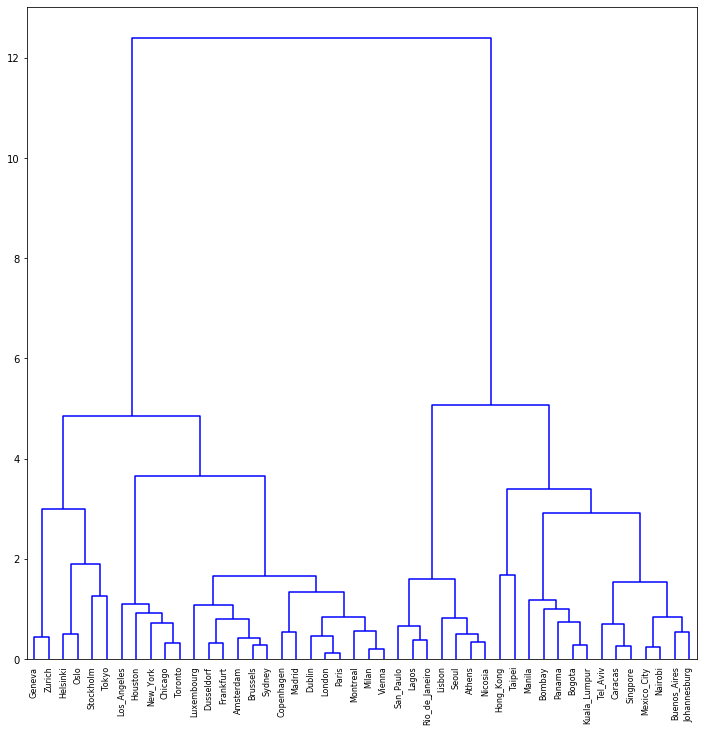

In [15]:
#Строим дендаграмму, предварительно отключив автоматическое разбиение на кластеры (color_threshold = -1)
figr = plt.figure(figsize = (12,12))
dn1 = dendrogram(link, color_threshold = -1, labels = df.index.tolist())

В качестве порога для расстояния возьмем значение = 2, тогда у нас получится 8 класстеров, описание которых мы приведем ниже.

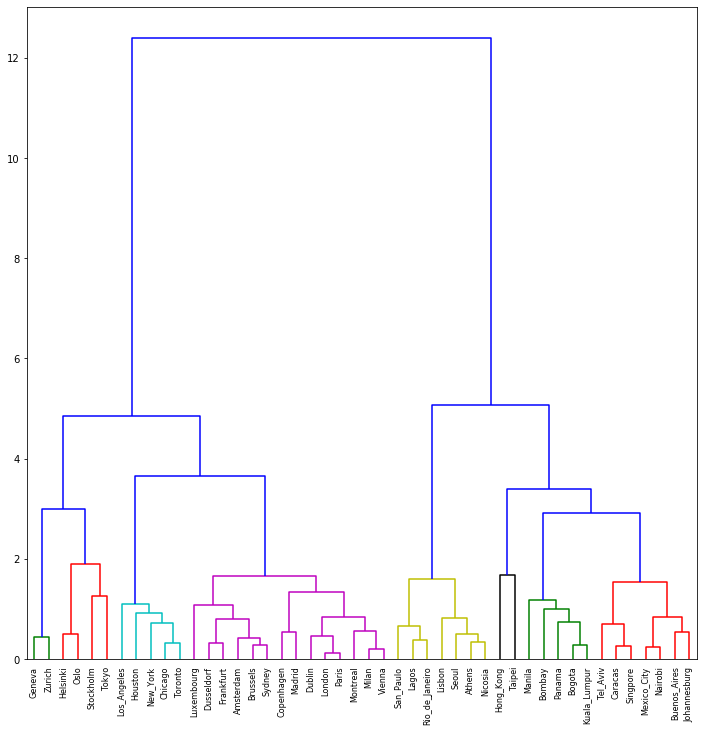

In [16]:
#Раскрашиваем нашу дендограмму 
figr = plt.figure(figsize = (12,12))
dn1 = dendrogram(link, color_threshold = 2, labels = df.index.tolist())

In [26]:
df_s['cluster'] = fcluster(link, 2, criterion='distance')

Опишем получившиеся кластеры: 
- 1) Города Швейцарии 
- 2) Города с высоким уровнем жизни, с высокой стоймостью на жилье и средними зарплатами
- 3) Города Северной Америки развитых капиталистических стран, с достаточно большим уровнем безработицы, судя по большому числу часов работы и средней зарплаты 
- 4) Города с уровнем жизни выше среднего
- 5) Города зависимых капиталистических стран с уровнем жизни около среднего
- 6) Города с среднем уровнем жизни, с высоким числом часов работы и с зарплатами ниже среднего, скорее всего в этих городах нередки протесты
- 7) Города с дешевой рабочей силой и с низким уровнем жизни, скорее всего это города, в которых расположено много предприятий крупных компаний развитых капиталистических стран, использующих дешевый труд
- 8) Города с низкой зарплатой и средней или чуть выше средней стоймостью на жилье, скорее всего это города с высоким социальным неравенством 

Заметим, что разбиение на расстояние больше 2-х нам не подойдет, ибо тогда у нас как минимум объединятся кластеры 7 и 8, и такое разбиение будет некорректным, так как эти города имеют разный экономический уровень. 

In [28]:
print(df_s)

                    Work     Price    Salary  cluster  Cluster
City                                                          
Amsterdam      -0.962166 -0.212712  0.386095        4        4
Athens         -0.509827 -0.770489 -0.373488        5        5
Bogota          1.577891 -1.522069 -1.145323        7        7
Bombay          0.997969 -1.881316 -1.398517        7        7
Brussels       -0.996961  0.174896  0.447351        4        4
Buenos_Aires    0.528233 -0.661769 -1.104485        8        8
Caracas         0.934178 -0.430150 -1.169825        8        8
Chicago         0.255670  0.179623  0.912902        3        3
Copenhagen     -0.944768  1.002108  0.953740        4        4
Dublin         -0.701201  0.278888  0.075727        4        4
Dusseldorf     -1.083949  0.397062  0.843478        4        4
Frankfurt      -1.333315  0.207985  0.851646        4        4
Geneva          0.000504  1.219546  2.072696        1        1
Helsinki       -1.234729  2.056212  1.104840        2  